In [7]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test =  train_test_split(X, y , test_size = 0.3)


In [9]:
class kNearestNeighbors(): 


    def __init__(self, k):
        self.k = k 


    def fit(self, X_train , y_train): 
        self.X_train = X_train
        self.y_train = y_train
        self.number_classes = len(np.unique(y_train))


    def nearNeighbors(self , X_test):
        dist = np.sqrt(np.sum((X_test - self.X_train)**2 ,axis=1))
        near_neighbors = np.argsort(dist)[:self.k]
        return near_neighbors

        
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        y = np.argmax(np.bincount(self.y_train[near_neighbors]))
        return y

    def Evaluate (self, X_test, y_test):
        Succes=0
        Test_len = len(X_test)
        for i in range (Test_len):
            Prediction = self.predict(X_test[i])
            if Prediction == y_test[i]:
                Succes = Succes+1 
        Accuracy = Succes / Test_len
        return Accuracy

In [10]:
Knn_num=[1,3,5,7,9,11,13,15,17]
all_Eva=[]

for i in Knn_num:
    knn=kNearestNeighbors(k=i)
    knn.fit(X_train,y_train)
    current_ev = knn.Evaluate (X_test,y_test)
    all_Eva.append(current_ev)
print(all_Eva)

[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


<BarContainer object of 9 artists>

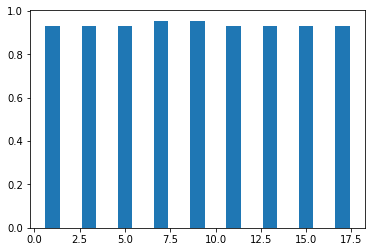

In [11]:
plotx=all_Eva
ploty=Knn_num
plt.bar(x=ploty, height=plotx)

Y_TEST is -------> [0 2 1 1 0 0 0 2 0 1 0 2 2 0 2 0 2 0 1 1 0 0 2 1 0 1 2 2 2 1 1 0 2 1 2 1 0
 2 2 2 1 0 1 2 0]
Y_PRED is -------> [0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0]
[[16  0  0]
 [ 0 11  2]
 [ 0  1 15]]


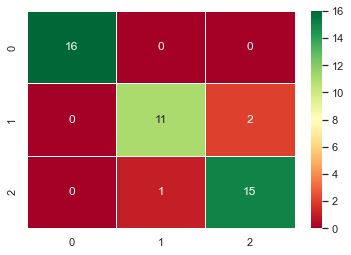

In [36]:

y= []
new_knn = kNearestNeighbors(k=5)
new_knn.fit(X_train,y_train)
for xts in X_test:
    y.append(new_knn.predict(xts))

print ("Y_TEST is ------->" , y_test)

print ("Y_PRED is ------->" , y)

setosa_setosa = 0
setosa_versicolor = 0 
setosa_virginica = 0

versicolor_setosa = 0
versicolor_versicolor= 0
versicolor_virginica = 0

virginica_setosa = 0
virginica_versicolor = 0
virginica_virginica = 0

for i in range (len(y_test)):
    if y_test[i] == 0 and y[i] == 0:
        setosa_setosa = setosa_setosa + 1
    if y_test[i] == 0 and y[i] == 1:
        setosa_versicolor = setosa_versicolor + 1
    if y_test[i] == 0 and y[i] == 2:
        setosa_virginica = setosa_virginica + 1 

    if y_test[i] == 1 and y[i] == 0:
        versicolor_setosa = versicolor_setosa + 1
    if y_test[i] == 1 and y[i] == 1:
        versicolor_versicolor = versicolor_versicolor + 1
    if y_test[i] == 1 and y[i] == 2:
        versicolor_virginica = versicolor_virginica + 1

    if y_test[i] == 2 and y[i] == 0:
        virginica_setosa = virginica_setosa + 1
    if y_test[i] == 2 and y[i] == 1:
        virginica_versicolor = virginica_versicolor + 1 
    if y_test[i] == 2 and y[i] == 2:
        virginica_virginica = virginica_virginica + 1
        
conf_mat = np.array([[setosa_setosa, setosa_versicolor,setosa_virginica] , [versicolor_setosa , versicolor_versicolor, versicolor_virginica] , [virginica_setosa, virginica_versicolor, virginica_virginica ]])
print(conf_mat)


sns.set_theme()
cofm_data = [[setosa_setosa, setosa_versicolor,setosa_virginica] , [versicolor_setosa , versicolor_versicolor, versicolor_virginica] , [virginica_setosa, virginica_versicolor, virginica_virginica ]]
cm_plot = sns.heatmap(cofm_data,annot=True, fmt="d" , cmap = 'RdYlGn' , linewidths=.5 )